0: 9.871666666666666 %
1: 11.236666666666666 %
2: 9.93 %
3: 10.218333333333334 %
4: 9.736666666666666 %
5: 9.035 %
6: 9.863333333333333 %
7: 10.441666666666666 %
8: 9.751666666666667 %
9: 9.915000000000001 %



Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
) 


output of a random 28*28 array which doesn't demonstrate any digit from 0 to 9 = 
 tensor([[-2.3056, -2.3985, -2.3051, -2.3016, -2.3264, -2.3025, -2.0997, -2.3731,
         -2.3038, -2.3396]], grad_fn=<LogSoftmaxBackward0>) 


we can actually see that the image does not belong to any of the classes from 0 to 9 


tensor(0.0381, grad_fn=<NllLossBackward0>)
tensor(0.0105, grad_fn=<NllLossBackward0>)
The Accuracy is 10.0 % .


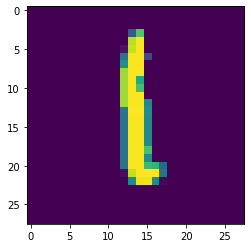

In [1]:
'''
____________Author_____________
Nazanin Mohammadrezaei

__________ Resource ___________
Sentdex YouTube channel

___________ Playlist __________
Deep Learning and Neural Networks using PyTorch

___________ Video ____________
Part 2-3-4 : Data-Building our neural network-Training the model

'''   

import torch
import numpy as np
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim



# download MNIST data
train = datasets.MNIST("",train = True, download = True,
               transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("",train = False, download = True,
               transform = transforms.Compose([transforms.ToTensor()]))



# load the data
'''Why shuffle=True? 
 If the first ten images are 3, our network will say all images are 3'''
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)



# visualize the fifth image of the dataset as an instance
for i,data in enumerate(trainset):
    if i==5:
        x, y = data[0][0], data[1][0]
        plt.imshow(x.view([28,28]))        
    

    
# if data is not balanced meaning that for instance 60% of training images are 3 
# the network realizes the best way to reduce loss is to always predict 3
# then we must make our data balanced - in this case, the data is already balanced
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:   
    xs, ys = data       
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1 
        
for i in counter_dict:  
    print(f'{i}: {counter_dict[i]/total*100} %')
print('\n\n')


    
# Build a Neural Network
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28,64)
        self.fc2 = nn.Linear(64,64)
        self.fc3 = nn.Linear(64,64)
        self.fc4 = nn.Linear(64,10)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x,dim=1)
        
net = Net()
print(net,'\n\n')



# give a fake image to the network and see the result
X = torch.rand([28,28])  # fake image
X = X.view([-1,28*28])   # flatten the data
output = net(X)
print("output of a random 28*28 array which doesn't demonstrate any digit from 0 to 9 = \n", output,'\n\n')
print('we can actually see that the image does not belong to any of the classes from 0 to 9 \n\n') 



# train the network
optimizer = optim.Adam(net.parameters(),lr=0.001)
Epochs = 2
for epoch in range(Epochs):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)
    
    
    
# evaluate the accuracy which we expect to be low because we only have fully connected layes and no convolution layer
total = 0
correct = 0
with torch.no_grad():
    for data in trainset:
        X, y = data
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1       
print (f"The Accuracy is {round(correct/total,3)*100} % .")